# Atomic Mass Evaluation 2016 Data Exploration

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
# import seaborn as sns

sys.path.append("../..")
pd.set_option('display.max_columns', 500)

In [4]:
import nucml.datasets as nuc_data

In [5]:
# This is were our figures will be stored
fig_dir = "../Figures/AME/"

In [6]:
# sns.set(font_scale=2)
# sns.set_style("white")
# plt.rcParams.update({'font.size': 13})

# Loading Merged Files with Natural Data with and without NaNs

In [51]:
ame = nuc_data.load_ame(natural=False, nan=True)
ame_filled = nuc_data.load_ame()

INFO:root:AME: Reading and loading Atomic Mass Evaluation files from: 
 C:\Users\Pedro\Desktop\ML_Nuclear_Data\AME\AME_Natural_Properties_w_NaN.csv
INFO:root:AME: Reading and loading Atomic Mass Evaluation files from: 
 C:\Users\Pedro\Desktop\ML_Nuclear_Data\AME\AME_Natural_Properties_no_NaN.csv


In [52]:
# How many rows with missing values exists?
ame[ame.isnull().any(axis=1)]

,N,Z,A,EL,O,Mass_Excess,dMass_Excess,Binding_Energy,dBinding_Energy,B_Decay_Energy,dB_Decay_Energy,Atomic_Mass_Micro,dAtomic_Mass_Micro,S(2n),dS(2n),S(2p),dS(2p),Q(a),dQ(a),Q(2B-),dQ(2B-),Q(ep),dQ(ep),Q(B-n),dQ(B-n),S(n),dS(n),S(p),dS(p),Q(4B-),dQ(4B-),"Q(d,a)","dQ(d,a)","Q(p,a)","dQ(p,a)","Q(n,a)","dQ(n,a)","Q(g,p)","Q(g,n)","Q(g,pn)","Q(g,d)","Q(g,t)","Q(g,He3)","Q(g,2p)","Q(g,2n)","Q(g,a)","Q(p,n)","Q(p,2p)","Q(p,pn)","Q(p,d)","Q(p,2n)","Q(p,t)","Q(p,3He)","Q(n,2p)","Q(n,np)","Q(n,d)","Q(n,2n)","Q(n,t)","Q(n,3He)","Q(d,t)","Q(d,3He)","Q(3He,t)","Q(3He,a)","Q(t,a)",Neutrons,Mass_Number,Flag
0,1,0,1,n,Other,8071.31713,0.00046,0.000,0.000,782.347,0.000,1.008665e+06,0.00049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0005,NaN,0.00,2224.566,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,6257.229,NaN,763.755,20577.6194,NaN,1,1,I
1,6,1,7,H,-nn,49135.00000,1004.00000,940.000,143.000,23062.000,1004.000,7.052749e+06,1078.00000,-100.00,1000.00,NaN,NaN,NaN,NaN,34228.00,1004.00,NaN,NaN,23472.00,1004.00,812.00,1036.00,NaN,NaN,21459.0,1004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-812.00,NaN,NaN,NaN,NaN,NaN,100.00,NaN,22279.6535,NaN,-812.00,1412.566,22689.6535,8581.7949,NaN,NaN,NaN,NaN,-812.00,NaN,NaN,5445.229,NaN,23043.408,19765.6194,NaN,6,7,I
2,5,1,6,H,-3n,41875.72100,254.12700,961.639,42.354,24283.626,254.127,6.044955e+06,272.81600,-1111.96,273.09,NaN,NaN,NaN,NaN,27788.84,254.13,NaN,NaN,22573.17,254.91,-911.96,269.41,NaN,NaN,-5444.0,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,911.96,NaN,NaN,NaN,NaN,NaN,1111.96,NaN,23501.2795,NaN,911.96,3136.526,21790.8235,9593.7549,NaN,NaN,NaN,NaN,911.96,NaN,NaN,7169.189,NaN,24265.034,21489.5794,NaN,5,6,I
3,4,1,5,H,-nn,32892.44400,89.44300,1336.359,17.889,21661.211,91.652,5.035311e+06,96.02000,-1800.00,89.44,NaN,NaN,NaN,NaN,21213.56,102.47,NaN,NaN,22396.21,89.44,-200.00,134.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.00,NaN,NaN,NaN,NaN,NaN,1800.00,NaN,20878.8645,NaN,200.00,2424.566,21613.8635,10281.7949,NaN,NaN,NaN,NaN,200.00,NaN,NaN,6457.229,NaN,21642.619,20777.6194,NaN,4,5,I
4,3,1,4,H,-n,24621.12700,100.00000,1720.449,25.000,22196.211,100.000,4.026432e+06,107.35400,4657.23,100.00,NaN,NaN,NaN,NaN,-702.06,234.52,NaN,NaN,1618.59,100.00,-1600.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN,21413.86,100.0,NaN,NaN,NaN,1600.00,NaN,NaN,1599.9951,NaN,NaN,-4657.23,NaN,21413.8645,NaN,1600.00,3824.566,836.2435,3824.5649,NaN,NaN,NaN,NaN,1600.00,NaN,NaN,7857.229,NaN,22177.619,22177.6194,NaN,3,4,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,177,117,294,Eh,-a,196521.00000,660.00000,7092.000,2.000,-2942.000,936.000,2.942110e+08,708.00000,13197.00,940.00,NaN,NaN,11202.60,50.0,NaN,NaN,NaN,NaN,-10423.00,963.00,5935.00,1045.00,1437.0,882.0,NaN,NaN,18991.0,1041.0,13998.00,900.0,18177.0,1025.0,-1437.0,-5935.00,-7080.0939,-4855.5279,-5815.8649,-2400.6194,NaN,-13197.00,11202.60,-3724.3465,-1437.0,-5935.00,-3710.434,-11205.3465,-4715.2051,637.9465,NaN,-1437.0,787.566,-5935.00,1401.7011,NaN,322.229,4056.4744,-2960.592,14642.6194,18376.8649,177,294,I
3550,175,118,293,Ei,-a,198873.00000,702.00000,7077.000,2.000,NaN,NaN,2.932135e+08,753.00000,NaN,NaN,3093.0,931.0,11920.00,500.0,NaN,NaN,3342.0,1069.0,NaN,NaN,NaN,NaN,1992.0,970.0,NaN,NaN,17783.0,919.0,NaN,NaN,19321.0,963.0,-1992.0,NaN,-8288.0939,-6063.5279,NaN,-1256.6194,-3093.0,NaN,11920.00,NaN,-1992.0,NaN,NaN,NaN,NaN,-570.0535,4124.3465,-1992.0,232.566,NaN,193.7011,4625.0404,NaN,3501.4744,NaN,NaN,17821.8649,175,293,I
3551,176,118,294,Ei,-a,199463.00000,663.00000,7079.000,2.000,NaN,NaN,2.942141e+08,712.00000,NaN,NaN,3356.0,1044.0,11840.37,65.9,NaN,NaN,1505.0,885.0,NaN,NaN,7481.00,966.00,2210.0,1047.0,NaN,NaN,16598.0,942.0,12527.00,890.0,17722.0,903.0,-2210.0,-7481.00,-9473.0939,-7248.5279,-7286.86

In [9]:
# What is the minimum/maximum of the features in ame
ame.describe()

,N,Z,A,Mass_Excess,dMass_Excess,Binding_Energy,dBinding_Energy,B_Decay_Energy,dB_Decay_Energy,Atomic_Mass_Micro,dAtomic_Mass_Micro,S(2n),dS(2n),S(2p),dS(2p),Q(a),dQ(a),Q(2B-),dQ(2B-),Q(ep),dQ(ep),Q(B-n),dQ(B-n),S(n),dS(n),S(p),dS(p),Q(4B-),dQ(4B-),"Q(d,a)","dQ(d,a)","Q(p,a)","dQ(p,a)","Q(n,a)","dQ(n,a)","Q(g,p)","Q(g,n)","Q(g,pn)","Q(g,d)","Q(g,t)","Q(g,He3)","Q(g,2p)","Q(g,2n)","Q(g,a)","Q(p,n)","Q(p,2p)","Q(p,pn)","Q(p,d)","Q(p,2n)","Q(p,t)","Q(p,3He)","Q(n,2p)","Q(n,np)","Q(n,d)","Q(n,2n)","Q(n,t)","Q(n,3He)","Q(d,t)","Q(d,3He)","Q(3He,t)","Q(3He,a)","Q(t,a)",Neutrons,Mass_Number
count,3554.000000,3554.000000,3554.000000,3436.000000,3436.000000,3436.000000,3436.000000,3141.000000,3141.000000,3.554000e+03,3436.000000,3199.000000,3199.000000,3081.000000,3081.000000,3298.000000,3298.000000,2848.000000,2848.000000,2964.000000,2964.000000,3023.000000,3023.000000,3318.000000,3318.000000,3258.000000,3258.000000,2284.000000,2284.000000,3367.000000,3367.000000,3331.000000,3331.000000,3195.000000,3195.000000,3258.000000,3318.000000,3367.000000,3367.000000,3331.000000,3195.000000,3081.000000,3199.000000,3298.000000,3141.000000,3258.000000,3318.000000,3318.000000,3023.000000,3199.000000,3367.000000,2964.000000,3258.000000,3258.000000,3318.000000,3367.000000,3081.000000,3318.000000,3258.000000,3141.000000,3318.000000,3258.000000,3554.000000,3554.000000
mean,82.181767,57.911930,140.093697,-24144.120957,123.588536,7959.806728,1.838921,-100.991337,155.851106,1.400688e+08,132.654412,15464.510253,156.349187,13711.908945,153.876813,-1028.352902,141.749175,-158.406791,148.478968,-6755.747156,150.761589,-7807.666279,151.842233,7755.557459,164.216263,6869.773398,160.008898,-324.475306,162.191690,11414.314298,175.347868,5894.960498,169.043993,6792.835383,160.967815,-6869.773398,-7755.557459,-14656.779602,-12432.213602,-13918.904402,-13784.784017,-13711.908945,-15464.510253,-1028.352902,-883.337837,-6869.773398,-7755.557459,-5530.991459,-8590.012779,-6982.715353,-6938.739202,-5973.400656,-6869.773398,-4645.207398,-7755.557459,-6174.984602,-5993.868545,-1498.328459,-1376.298998,-119.583337,12822.061941,12944.091502,77.334834,135.246764
std,43.721339,28.041019,71.277285,56200.705700,197.547987,738.982115,15.031735,8063.858254,239.079983,7.130796e+07,212.043923,6550.042919,242.338186,10078.915472,235.628998,6989.405614,233.060316,14319.652534,217.688173,12278.480250,225.980065,10536.785128,229.821244,3631.746683,254.377651,5444.802214,250.538488,23373.457604,203.785478,3977.016875,264.596607,4615.611122,257.035502,8215.124941,246.518545,5444.802214,3631.746683,3977.016875,3977.016875,4615.611122,8215.124941,10078.915472,6550.042919,6989.405614,8063.858254,5444.802214,3631.746683,3631.746683,10536.785128,6550.042919,3977.016875,12278.480250,5444.802214,5444.802214,3631.746683,3977.016875,10078.915472,3631.746683,5444.802214,8063.858254,3631.746683,5444.802214,49.938103,73.804449
min,0.000000,0.000000,1.000000,-91652.853000,0.000000,-2267.000000,0.000000,-28945.000000,0.000000,1.007000e+06,0.000000,-3120.000000,0.000000,-7630.000000,0.000000,-25474.730000,0.000000,-37359.770000,0.000000,-52959.000000,0.000000,-39622.000000,0.000000,-2488.000000,0.000000,-4527.000000,0.000000,-59615.000000,0.140000,-4128.000000,0.000000,-13545.000000,0.000000,-26083.000000,0.000000,-31008.000000,-27715.000000,-30199.093900,-27974.527900,-33358.864900,-46660.619400,-55187.000000,-40541.000000,-25474.730000,-29727.346500,-31008.000000,-27715.000000,-25490.434000,-40404.346500,-32059.205100,-22481.053500,-52176.653500,-31008.000000,-28783.434000,-27715.000000,-21717.298900,-47468.959600,-21457.771000,-25514.525600,-28963.592000,-7137.380600,-11194.135100,-118.000000,0.000000
25%,47.000000,36.000000,84.000000,-65400.443000,3.005750,7730.734250,0.024000,-5356.454000,6.406000,8.391198e+07,3.226500,11068.100000,5.400000,5819.440000,6.550000,-6262.357500,3.782500,-9937.682500,8.100000,-14125.250000,7.277500,-14561.930000,7.100000,5414.787500,5.140000,2772.250000,5.842500,-17485

# Visualizing some Features 

<Figure size 1008x720 with 0 Axes>

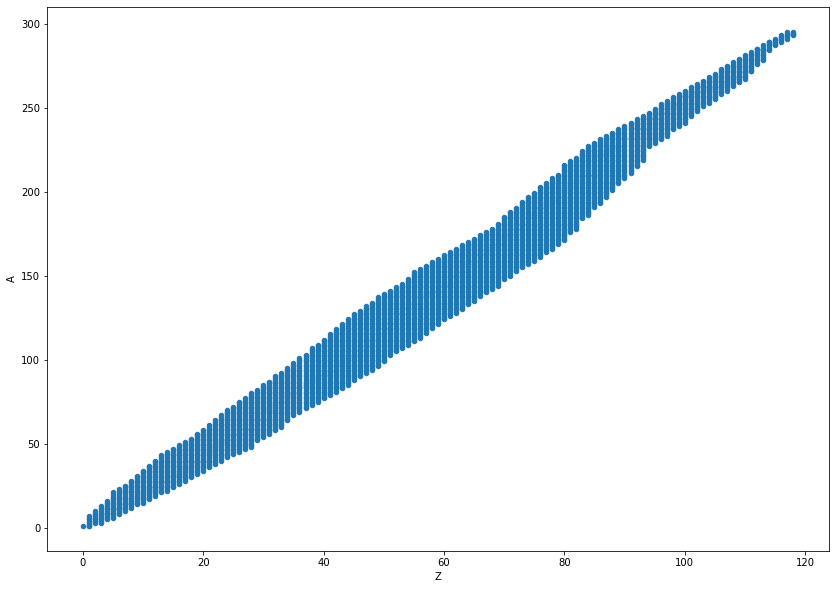

In [7]:
plt.figure(figsize=(14,10))
ame.plot(x="Z", y="A", kind='scatter', figsize=(14,10))

As mentioned in the AME data generation notebook, the values were imputed linearly. We can visualize them by overlapping the AME dataset with and without NaN values. For example:

Text(0.5, 0, 'Atomic Mass Number')

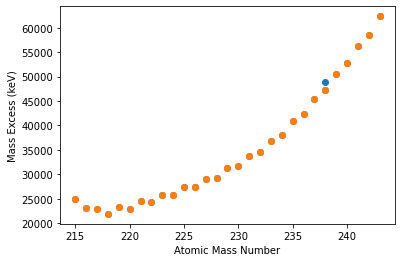

In [53]:
plt.scatter(ame_filled[ame_filled.Z == 92].sort_values(by="A").A, 
         ame_filled[ame_filled.Z == 92].sort_values(by="A").Mass_Excess)
plt.scatter(ame[ame.Z == 92].sort_values(by="A").A, 
         ame[ame.Z == 92].sort_values(by="A").Mass_Excess)
plt.ylabel("Mass Excess (keV)")
plt.xlabel("Atomic Mass Number")

We can automate this to create subplots:

In [12]:
def plot_comparison(protons, feature, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.scatter(ame_filled[ame_filled.Z == protons].sort_values(by="A").A, 
             ame_filled[ame_filled.Z == protons].sort_values(by="A")[feature])
    ax.scatter(ame[ame.Z == protons].sort_values(by="A").A, 
             ame[ame.Z == protons].sort_values(by="A")[feature])
    ax.set_ylabel(feature.replace("_" ," "))
#     ax.set_xlabel("Atomic Mass Number")

Here organe represents the original dataset while the blue points represent imputed values.

Text(0.5, 0, 'Atomic Mass Number')

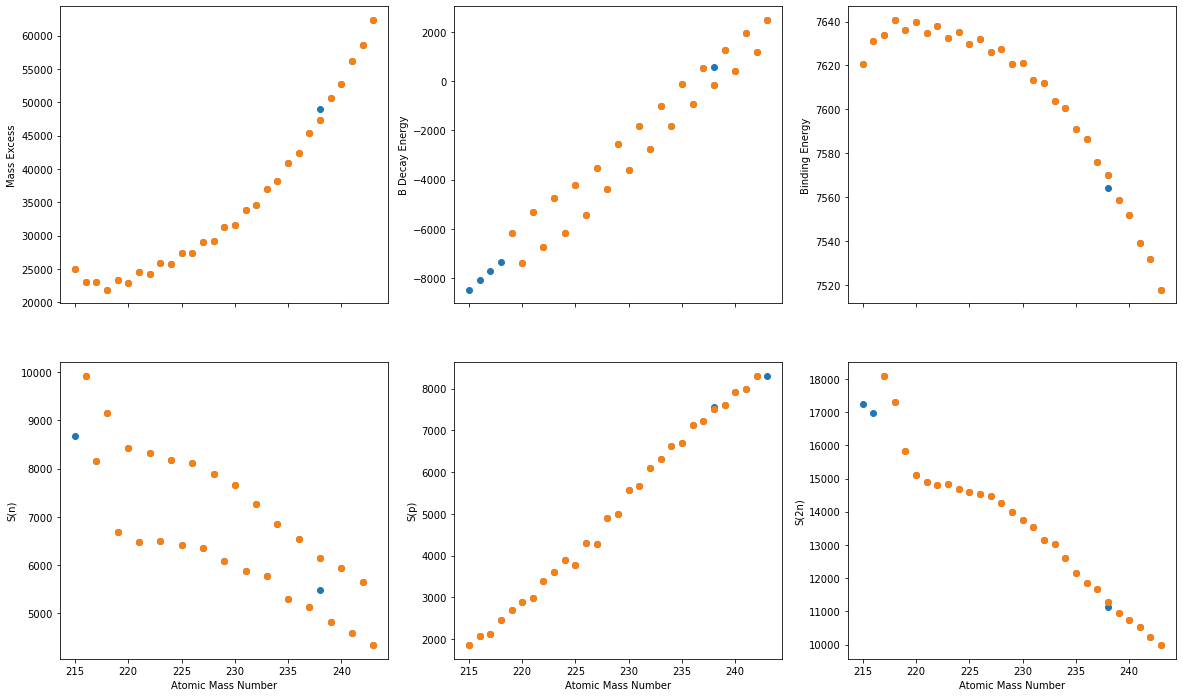

In [21]:
# make figure with subplots
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=True, figsize=(20,12))
plot_comparison(92, "Mass_Excess", ax1)
plot_comparison(92, "B_Decay_Energy", ax2)
plot_comparison(92, "Binding_Energy", ax3)
plot_comparison(92, "S(n)", ax4)
plot_comparison(92, "S(p)", ax5)
plot_comparison(92, "S(2n)", ax6)

ax4.set_xlabel("Atomic Mass Number")
ax5.set_xlabel("Atomic Mass Number")
ax6.set_xlabel("Atomic Mass Number")

# f.savefig(os.path.join(fig_dir, "AME_NaN.png"), bbox_inches='tight', dpi=500) 

# Visualizing Some Properties in 3D

In [29]:
import plotly.express as px

In [27]:
df_final = nuc_data.load_ame()

INFO:root:AME: Reading and loading Atomic Mass Evaluation files from: 
 C:\Users\Pedro\Desktop\ML_Nuclear_Data\AME\AME_Natural_Properties_no_NaN.csv


In [39]:
fig = px.scatter_3d(df_final, x='Z', y='N', z='Mass_Excess', color='Mass_Excess', 
                    title="AME2016 - Mass Excess")
fig.update_traces(marker=dict(size=2))
fig.show()
fig.write_image(os.path.join(fig_dir, "mass_excess.svg"))
fig.write_html(os.path.join(fig_dir, "mass_excess.html"))

In [40]:
fig = px.scatter_3d(df_final, x='Z', y='N', z='Binding_Energy', color='Mass_Excess', 
                    title="AME2016 - Binding Energy")
fig.update_traces(marker=dict(size=2))
fig.show()
fig.write_image(os.path.join(fig_dir, "binding_energy.svg"))
fig.write_html(os.path.join(fig_dir, "binding_energy.html"))

In [44]:
fig = px.scatter_3d(df_final, x='Z', y='N', z='S(n)', color='S(n)', 
                    title="AME2016 - Neutron Separation Energy")
fig.update_traces(marker=dict(size=2))
fig.show()
fig.write_image(os.path.join(fig_dir, "neutron_sep_energy.svg"))
fig.write_html(os.path.join(fig_dir, "neutron_sep_energy.html"))

In [45]:
fig = px.scatter_3d(df_final, x='Z', y='N', z='S(2n)', color='S(2n)', 
                    title="AME2016 - 2 Neutron Separation Energy")
fig.update_traces(marker=dict(size=2))
fig.show()
fig.write_image(os.path.join(fig_dir, "2neutron_sep_energy.svg"))
fig.write_html(os.path.join(fig_dir, "2neutron_sep_energy.html"))